# Importando Bibliotecas

In [242]:
pip install util-gfsilveira

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [243]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [244]:
import os #importando biblioteca de organização de arquivos
import joblib #convertendo imagens em valores numéricos .gz
import numpy as np #estruturação de dados
import matplotlib.pyplot as plt #plotagem de gráficos 
import matplotlib.image as mpimg #plotagem de imagens
# from util import meus_uteis, timeProcess
from PIL import Image
from util import *
import pandas as pd
import cv2

# Importando as imagens

In [245]:
diretorio = '/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imagens e rótulos para classificação 14-03-23' #alimentando a variável com os arquivos da pasta datasets
lista_dados = os.listdir(diretorio) #listando os arquivos dessa pasta
printLis(lista_dados) #printando as diferentes listas

-------------
-=< Lista >=-
-------------
0 -> soma_imagens_THP12023-3-15.gz
1 -> soma_imagens_SH-SY5Y2023-3-15.gz
2 -> soma_imagens_A172-2023-3-15.gz
3 -> soma_imagens_MAYV-2023-3-15.gz
4 -> soma_imagens_DENV-2023-3-15.gz
5 -> soma_imagens_VERO6-2023-3-15.gz
6 -> soma_imagens_A549-2023-3-15.gz
7 -> soma_imagens_HUH7-2023-3-15.gz
8 -> soma_imagens_3T3-2023-3-15.gz
9 -> soma_de_todas_imagens-2023-3-15.gz
10 -> rotulos_somados_THP1-2023-3-15.gz
11 -> rotulos_somados_SH-SY5Y-2023-3-15.gz
12 -> rotulos_somados_A172-2023-3-15.gz
13 -> rotulos_somados_MAYV-2023-3-15.gz
14 -> rotulos_somados_DENV-2023-3-15.gz
15 -> rotulos_somados_VERO6-2023-3-15.gz
16 -> rotulos_somados_A549-2023-3-15.gz
17 -> rotulos_somados_HUH7-2023-3-15.gz
18 -> soma_de_todos_rótulos-2023-3-15.gz
19 -> rotulos_somados_3T3-2023-3-15.gz
20 -> SH-SY5Y-KERNEL-ADD2023-4-10.gz
21 -> VERO6-KERNEL-ADD-2023-4-11.gz
22 -> A549-KERNEL-ADD-2023-4-11.gz
23 -> THP1-KERNEL-ADD-2023-4-11.gz
24 -> A172-KERNEL-ADD-2023-4-11.gz
25 -> MAYV

In [246]:
# Image_A549_lista_imagens_camp_claro_2023-4-7.gz
lista_imagens = joblib.load(diretorio+ '/' + lista_dados[6])
lista_imagens.shape

(1136, 200, 200, 3)

In [247]:
type(lista_imagens)

numpy.ndarray

# Visualização a primeira imagem com CV2

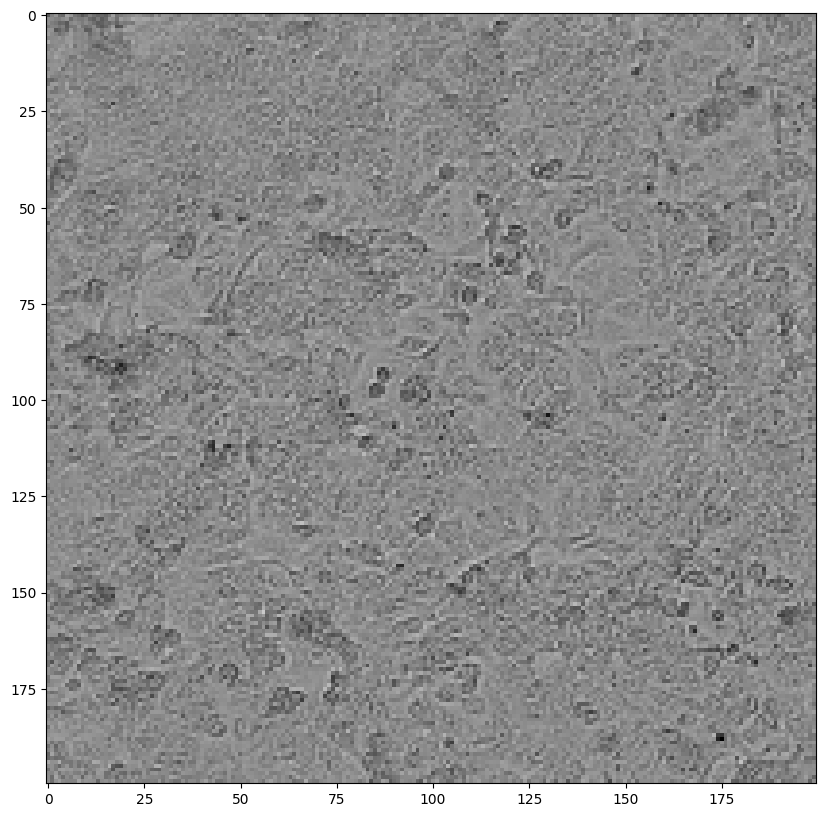

In [248]:
img_key = 0
cv2_img = cv2.cvtColor(lista_imagens[img_key], cv2.COLOR_RGB2BGR)
plt.figure(figsize=(10,10))
plt.imshow(cv2_img)
plt.show()

# Funções

In [249]:
def mostra_imagem(img: np.array) -> None:
    '''
        Mostra a imagem proveniente de um np.array
    '''
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.show()

In [250]:
def edita_array_seleciona_filtro(
    filtro: str,
    imagem: np.array,
    kernel = np.array([[0, -1,  0], [-1,  5, -1], [0, -1,  0]])) -> np.array:
    '''
        Função de aplicação de kernel
    
    Parameters:
        filtro = Usar um dos filtros ["filter2D", "blur", "GaussianBlur","medianBlur", "bilateralFilter"]
        imagem = Imagem a ser tratada
        kernel = Quando usar o filtro "filter2D", indicar um array com o kernel.
    '''
    # Converte o np.array em uma imagem CV2
    cv2_img = cv2.cvtColor(imagem, cv2.COLOR_RGB2BGR)
    
    # Filtros para seleção
    filter_type = ["filter2D", "blur", "GaussianBlur","medianBlur", "bilateralFilter"]
    
    
    if filtro == "filter2D":
        filter2d = cv2.filter2D(src=cv2_img, ddepth=-1, kernel=kernel)
        return filter2d
        
    elif filtro == "blur":
        filter2d = cv2.blur(cv2_img, ksize=(3,3))
        return filter2d
        
    elif filtro == "GaussianBlur":
        filter2d = cv2.GaussianBlur(cv2_img, ksize=(3,3), sigmaX=0)
        return filter2d
        
    elif filtro == "medianBlur":
        filter2d = cv2.medianBlur(cv2_img, 13)
        return filter2d
        
    elif filtro == "bilateralFilter":
        filter2d = cv2.bilateralFilter(cv2_img, d=13, sigmaColor=75, sigmaSpace=75)
        return filter2d
        
    else:
        print("Kernel não selecionado Corretamente")

# Aplicando o Kernel

## Filter Identity

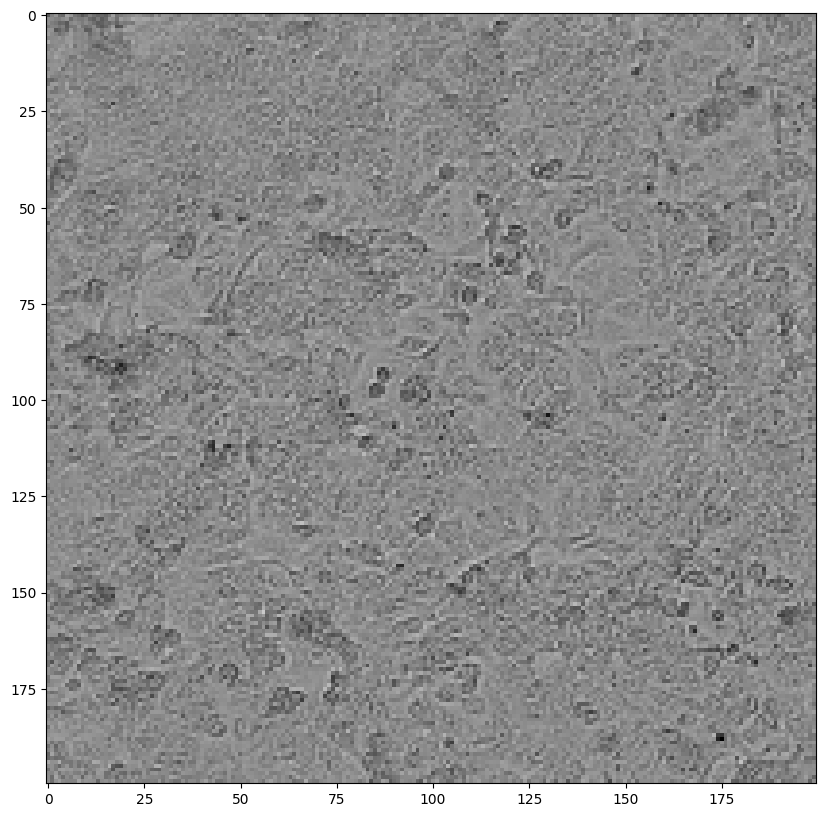

In [251]:
identity = np.array([
                    [0,0,0],
                    [0,1,0],
                    [0,0,0]])

img = edita_array_seleciona_filtro(
    filtro="filter2D",
    imagem=lista_imagens[img_key],
    kernel=identity
)
mostra_imagem(img)

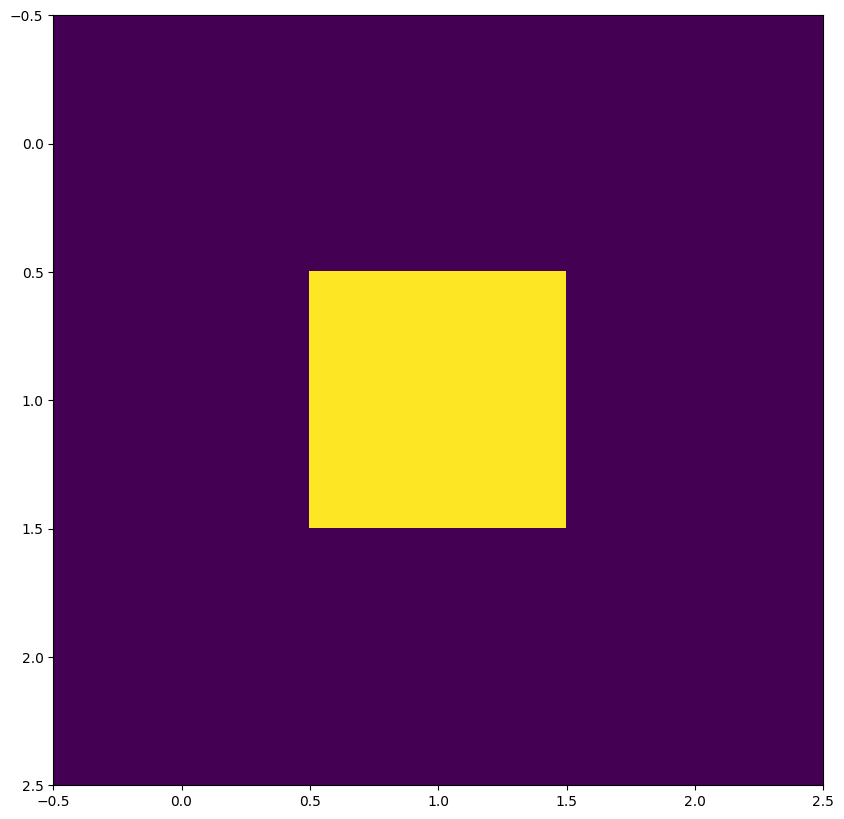

In [252]:
mostra_imagem(identity)

## Filter Ridge

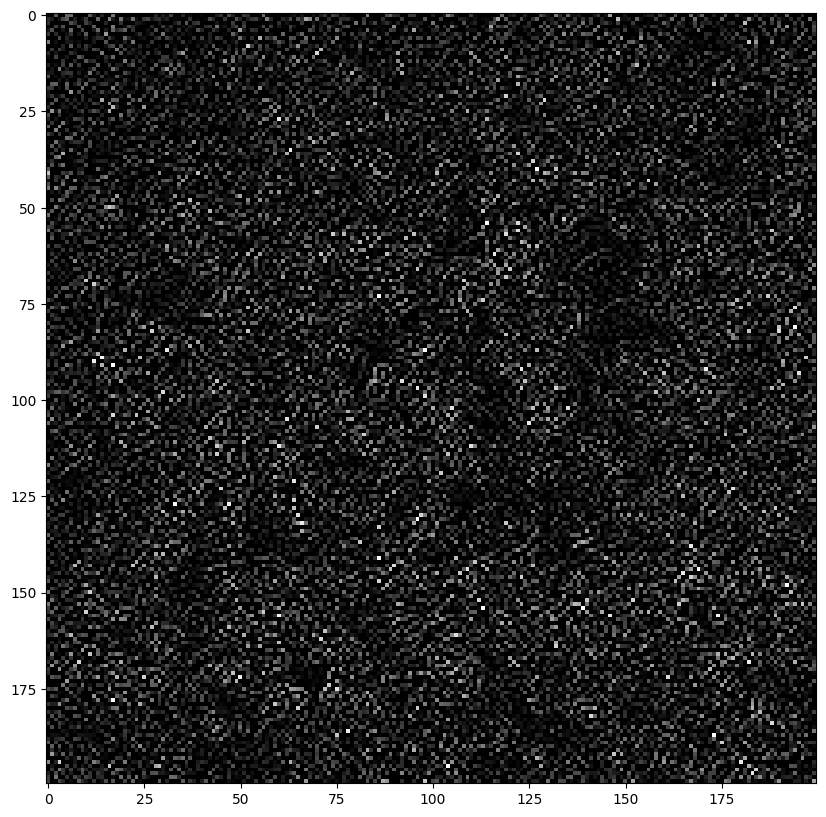

In [253]:
ridge = np.array([
                    [0,-1,0],
                    [-1,4,-1],
                    [0,-1,0]])

img = edita_array_seleciona_filtro(
    filtro="filter2D",
    imagem=lista_imagens[img_key],
    kernel=ridge
)
mostra_imagem(img)

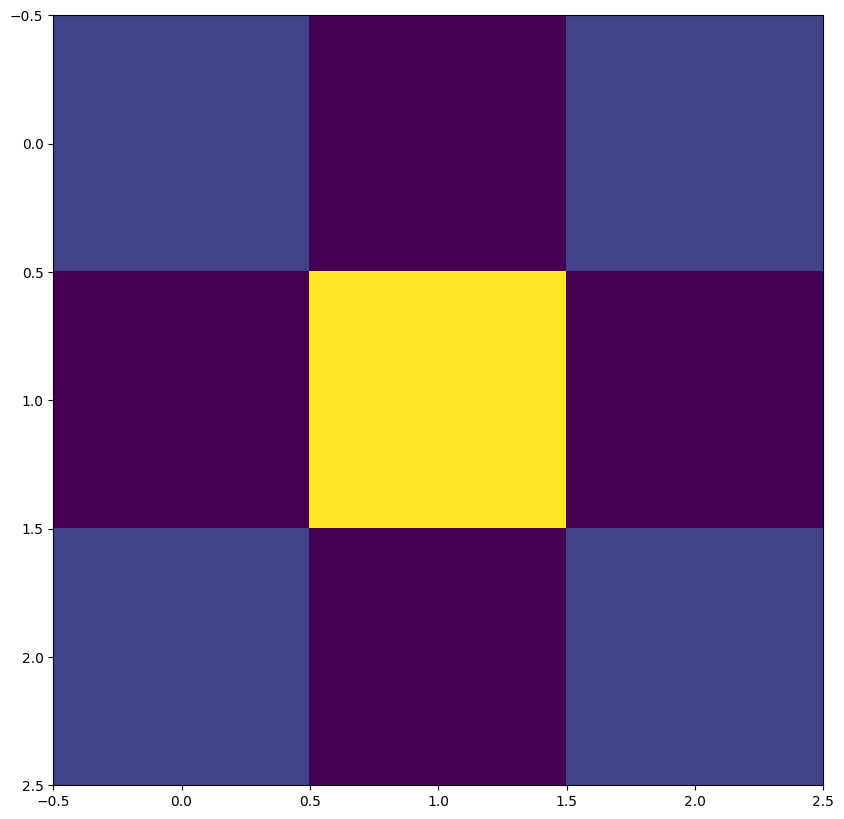

In [254]:
mostra_imagem(ridge)

## Filter Edge

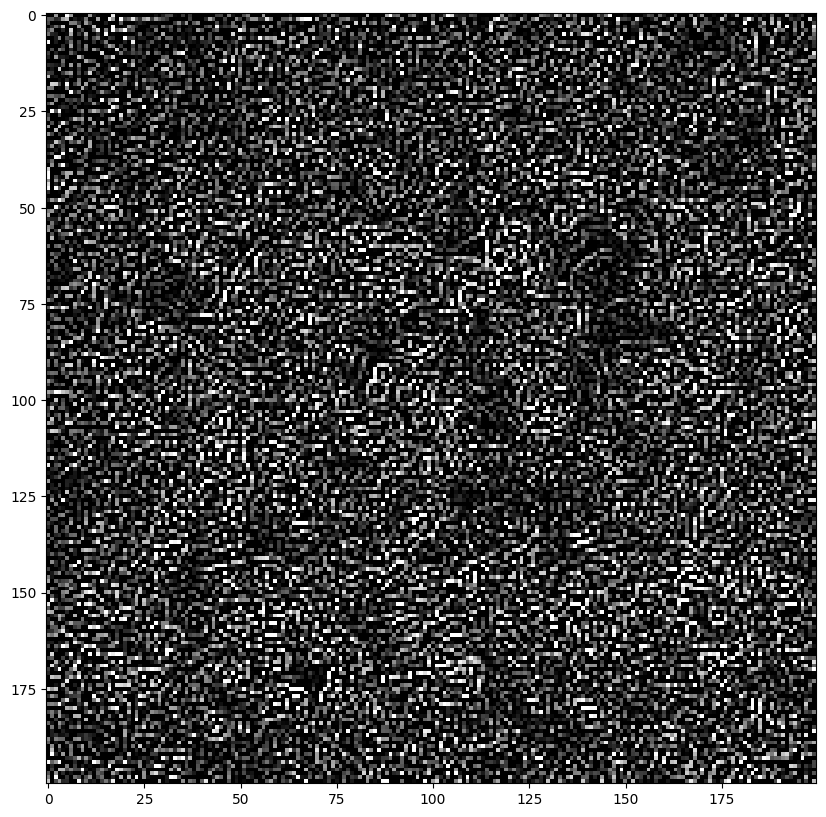

In [255]:
edge = np.array([
                    [-1,-1,-1],
                    [-1,8,-1],
                    [-1,-1,-1]])

img = edita_array_seleciona_filtro(
    filtro="filter2D",
    imagem=lista_imagens[img_key],
    kernel=edge
)
mostra_imagem(img)

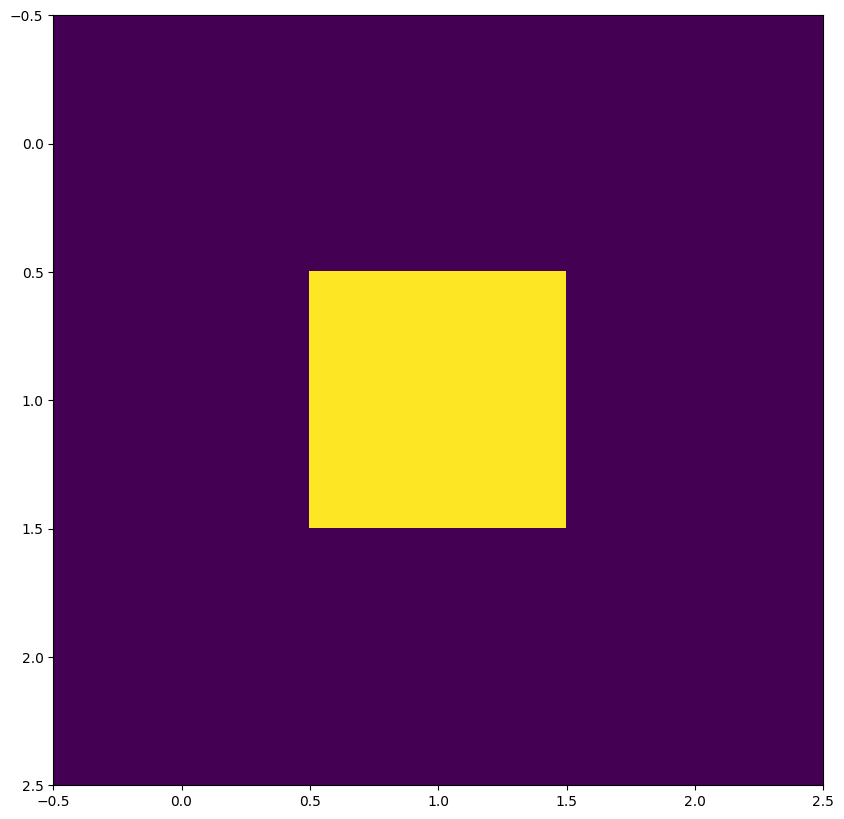

In [256]:
mostra_imagem(edge)

## Filter Sharpen

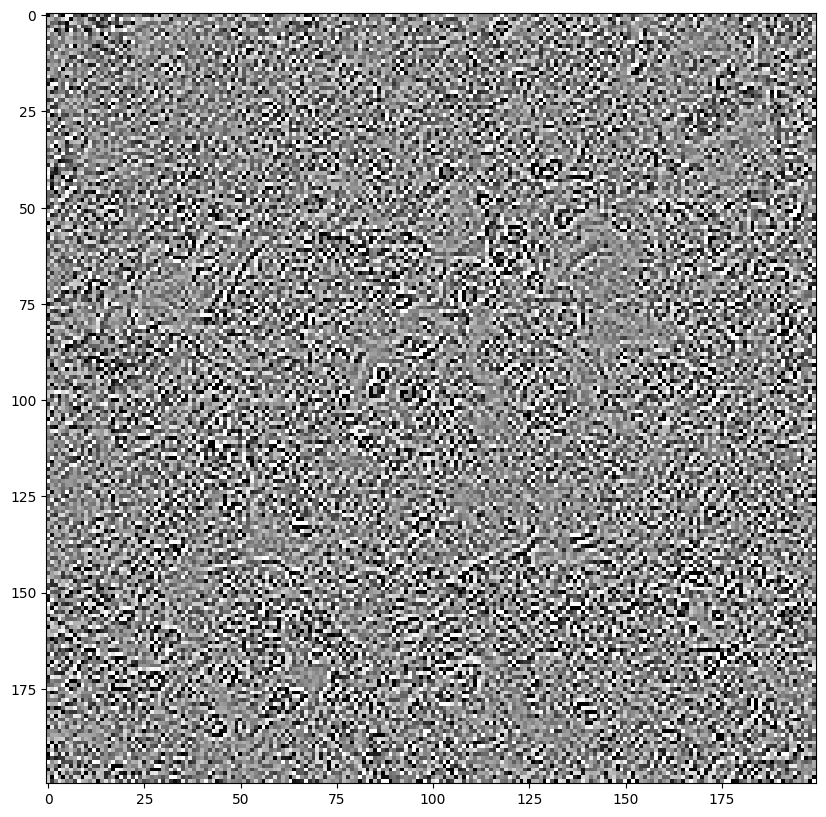

In [257]:
sharpen = np.array([
                    [0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]])

img = edita_array_seleciona_filtro(
    filtro="filter2D",
    imagem=lista_imagens[img_key],
    kernel=sharpen
)
mostra_imagem(img)

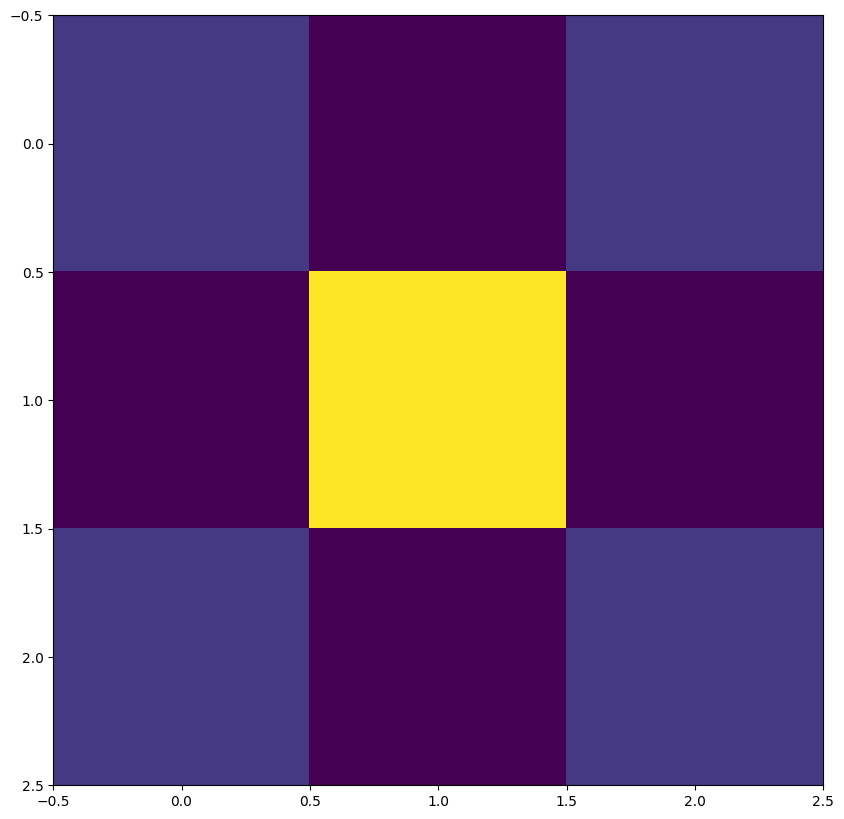

In [258]:
mostra_imagem(sharpen)

## Filter Box Blur

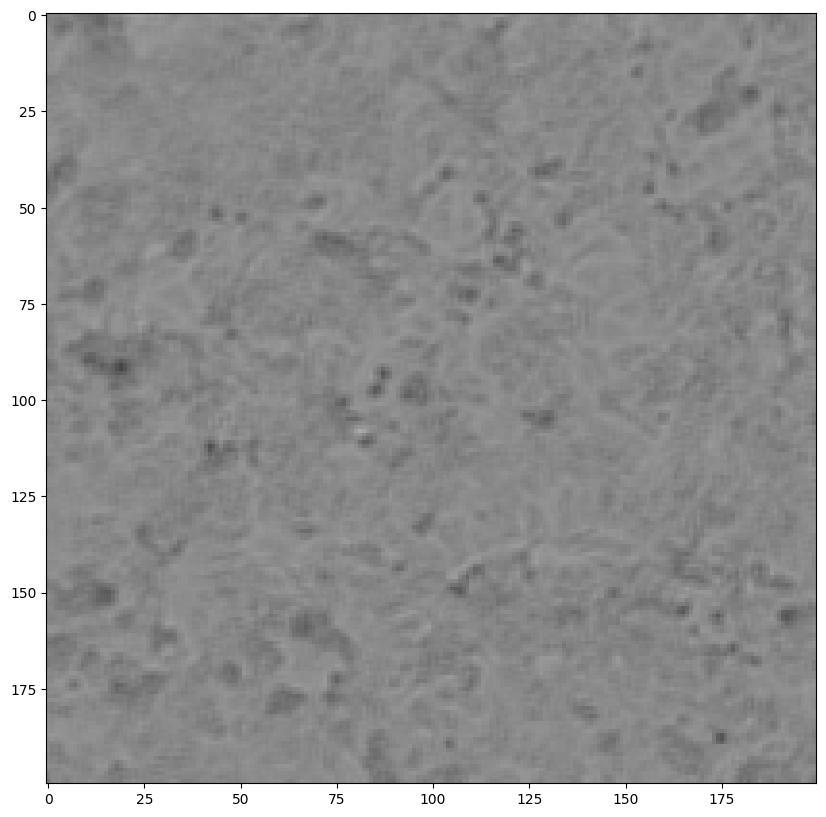

In [259]:
box_blur = np.array([
                    [1,1,1],
                    [1,1,1],
                    [1,1,1]])/9

img = edita_array_seleciona_filtro(
    filtro="filter2D",
    imagem=lista_imagens[img_key],
    kernel=box_blur
)
mostra_imagem(img)

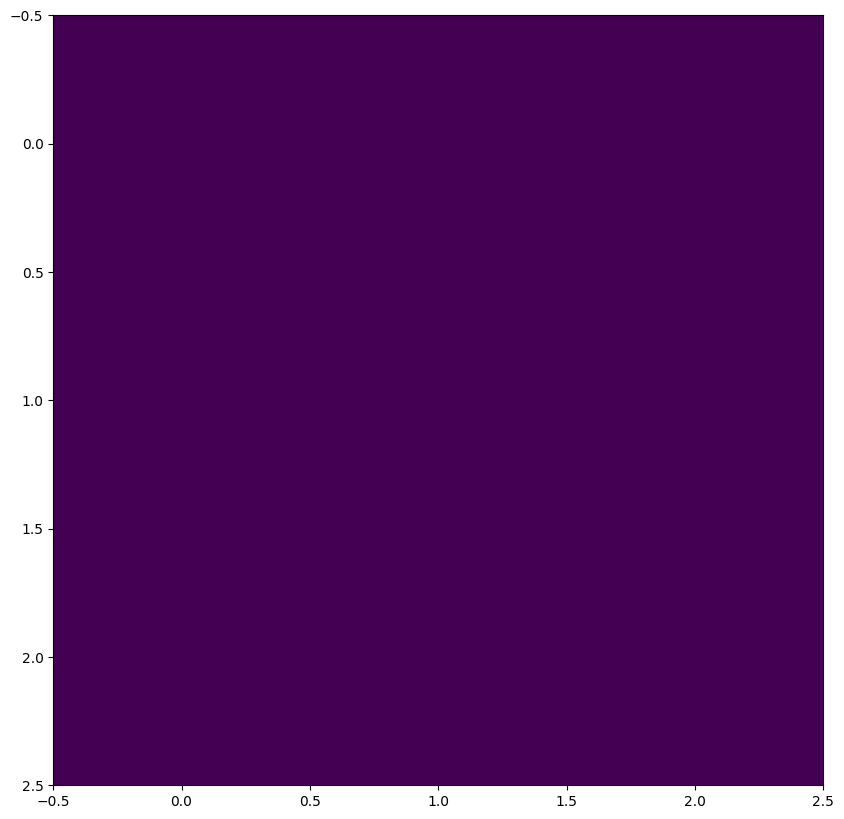

In [260]:
mostra_imagem(box_blur)

## Filter Gaussian Blur

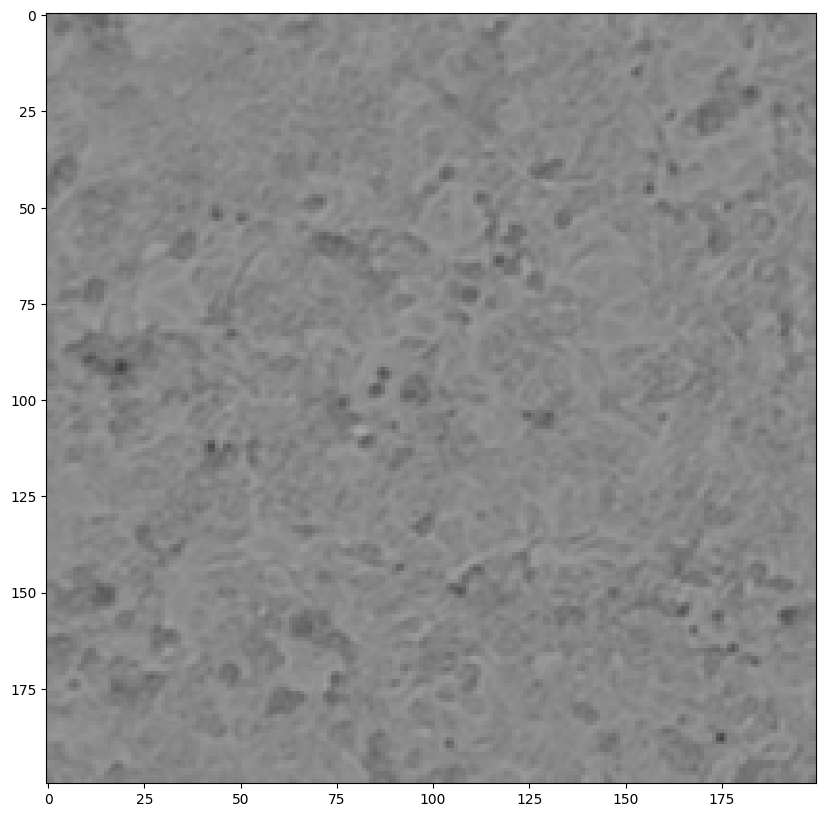

In [261]:
gau_blur = np.array([
                    [1,2,1],
                    [2,4,2],
                    [1,2,1]])/16

img = edita_array_seleciona_filtro(
    filtro="filter2D",
    imagem=lista_imagens[img_key],
    kernel=gau_blur
)
mostra_imagem(img)

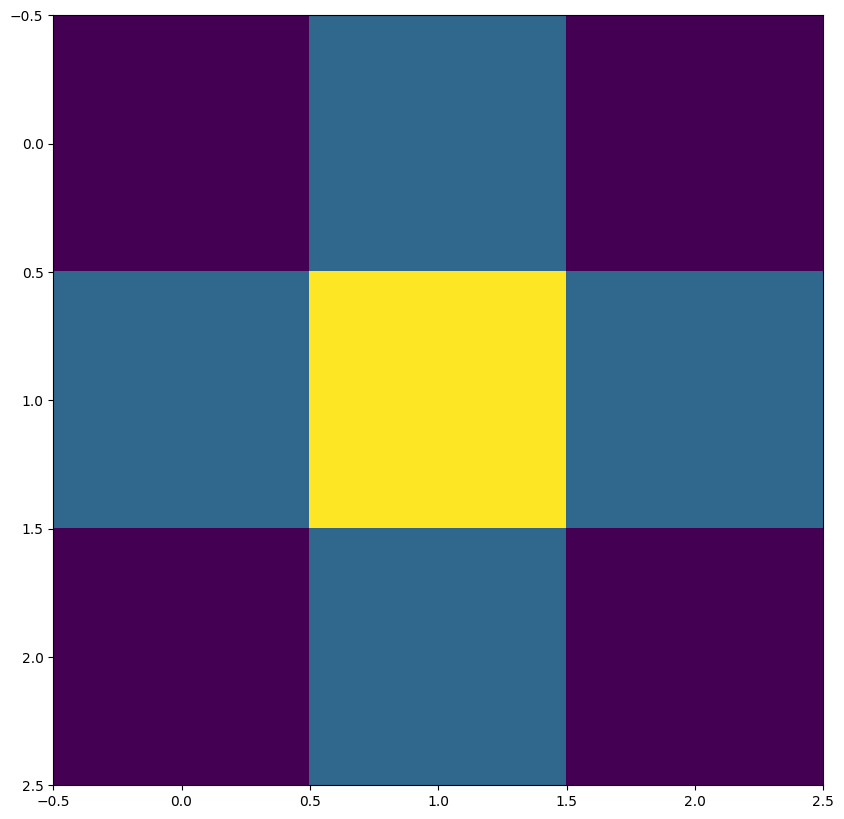

In [262]:
mostra_imagem(gau_blur)

# Outros Filtros

## Filter Blur

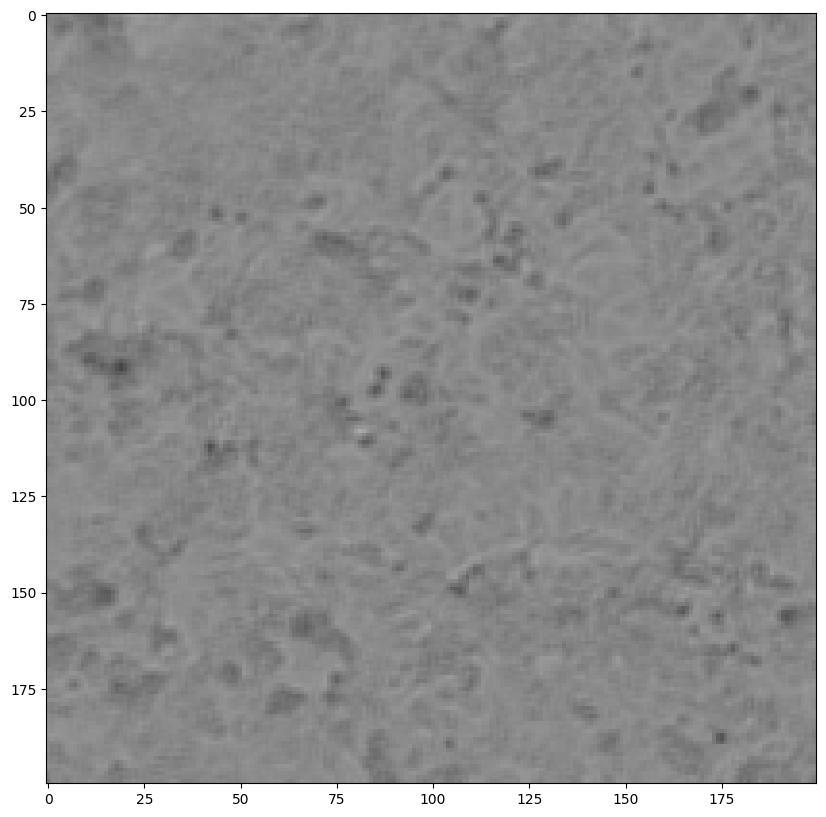

In [263]:
img = edita_array_seleciona_filtro("blur", lista_imagens[img_key])
mostra_imagem(img)

## Filtro GaussianBlur

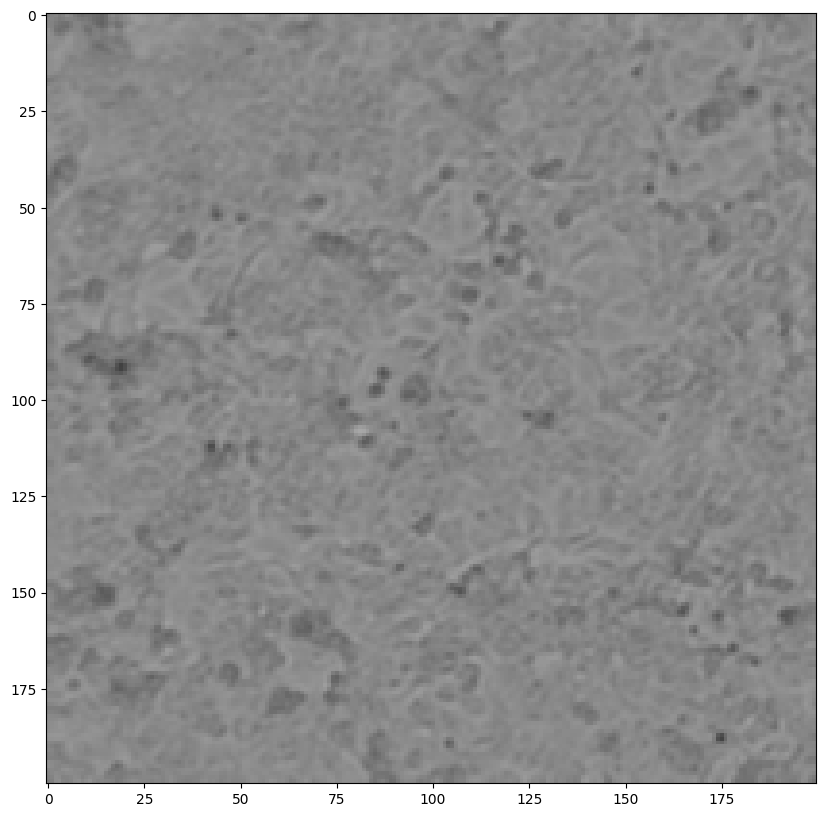

In [264]:
img = edita_array_seleciona_filtro("GaussianBlur", lista_imagens[img_key])
mostra_imagem(img)

## Filtro medianBlur

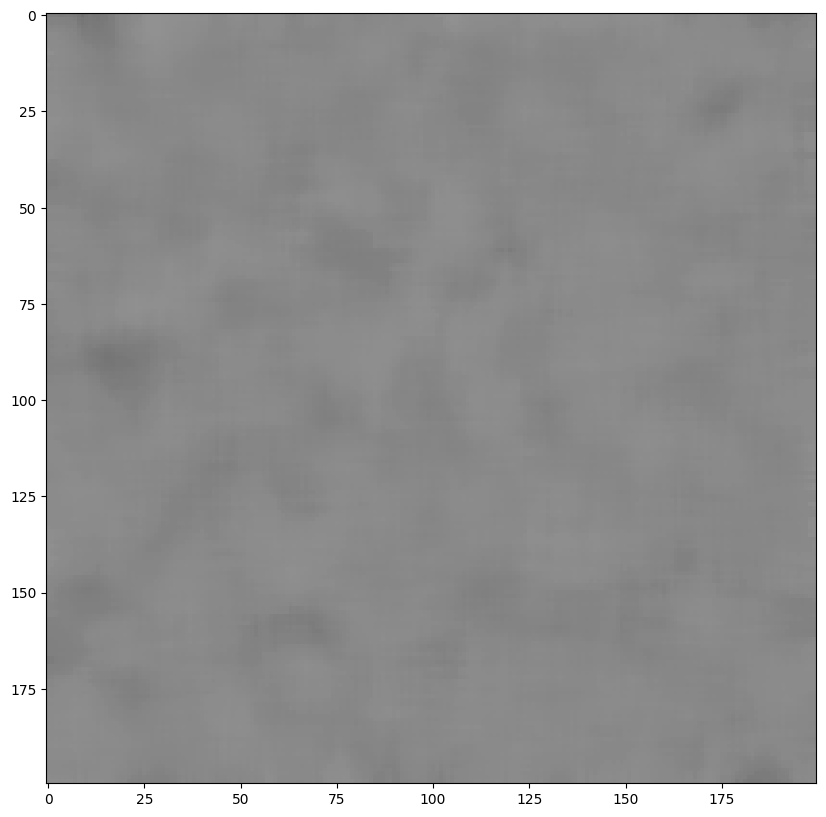

In [265]:
img = edita_array_seleciona_filtro("medianBlur", lista_imagens[img_key])
mostra_imagem(img)

## Filtro Bilateral

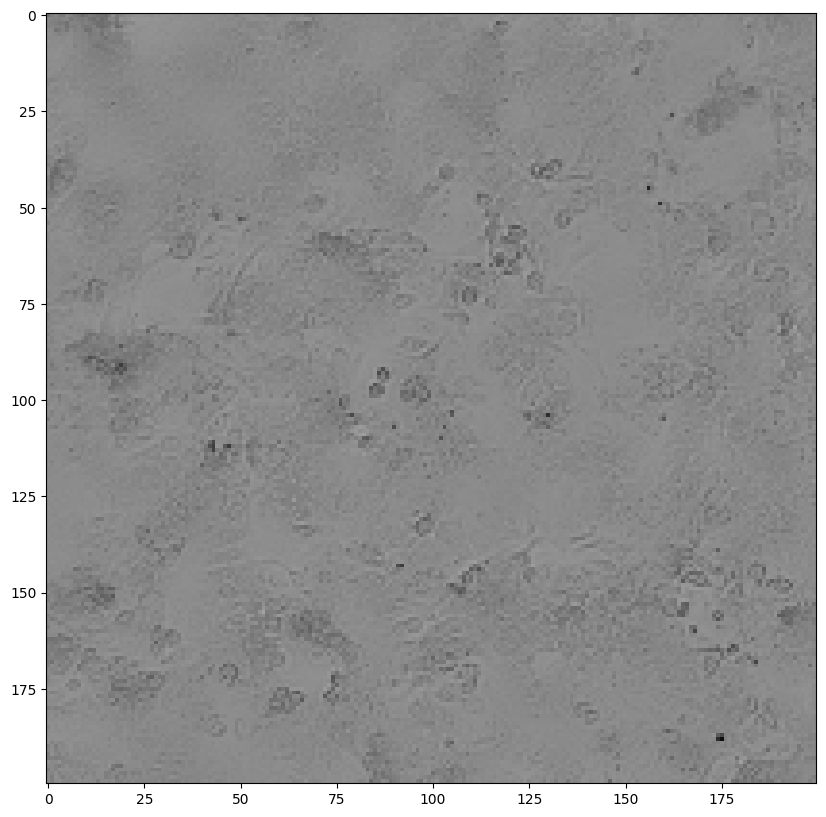

In [266]:
img = edita_array_seleciona_filtro("bilateralFilter", lista_imagens[img_key])
mostra_imagem(img)

# Aplicando a função a todo o array

In [267]:
lista_imagens.shape

(1136, 200, 200, 3)

In [268]:
lista_imagens_kernel = np.array([edita_array_seleciona_filtro(filtro="filter2D", imagem=i, kernel=sharpen) for i in lista_imagens])
lista_imagens_kernel.shape

(1136, 200, 200, 3)

Imagem do array completo aplicada o kernel

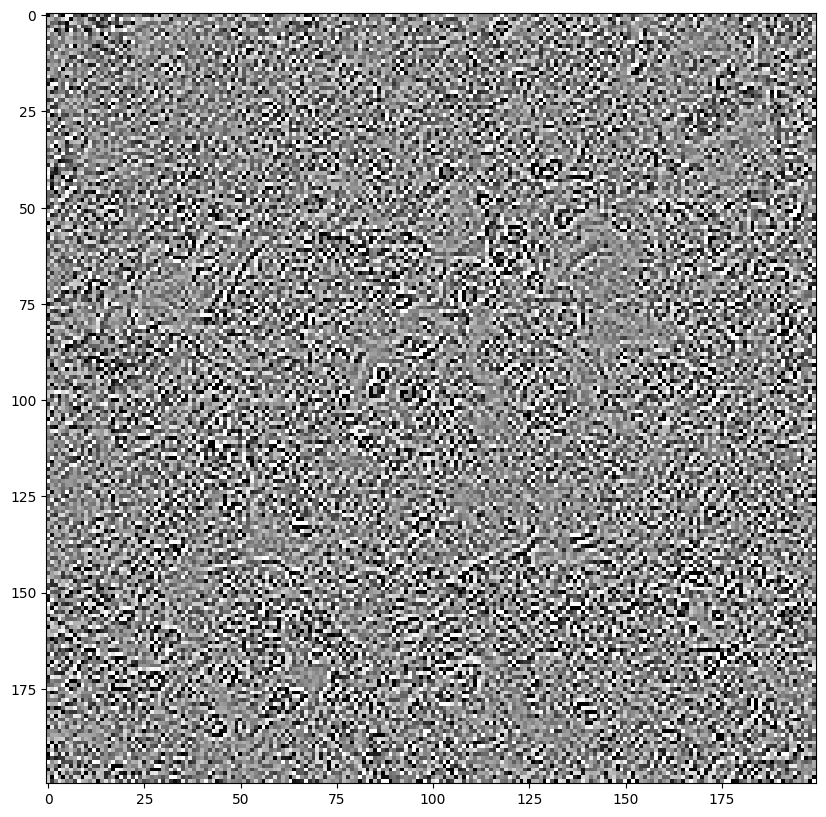

In [269]:
mostra_imagem(lista_imagens_kernel[img_key])

Comparando com a imagem salva no array completo

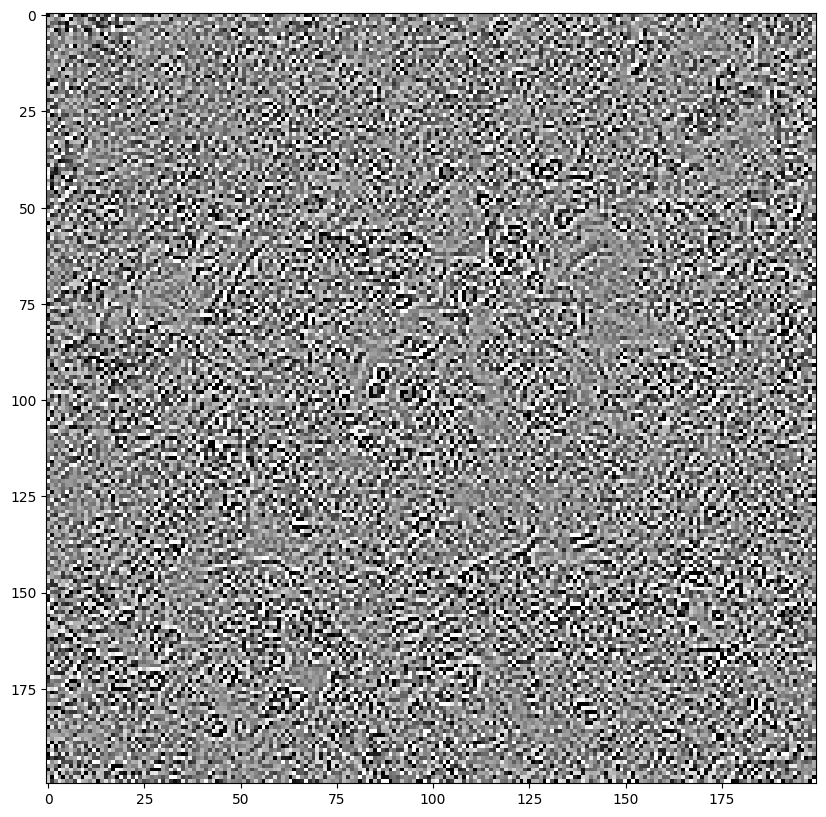

In [270]:
img_test = edita_array_seleciona_filtro(
    filtro="filter2D",
    imagem=lista_imagens[img_key],
    kernel=sharpen
)
mostra_imagem(img_test)

# Salva lista de imagens

## Tratadas com kernel Sharpen

In [271]:
data = timeProcess()[1]
#joblib.dump(lista_imagens_kernel, '/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imagens e rótulos para classificação 14-03-23/3T3-KERNEL-ADD-'+data+'.gz')